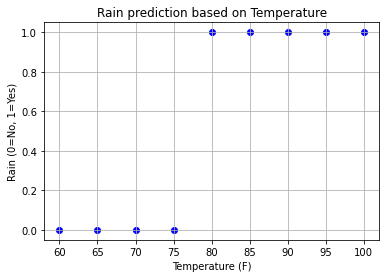

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#0 -> no rains 1-> rain
temperature = np.array([60,65,70,75,80,85,90,95,100])
rain = np.array([0,0,0,0,1,1,1,1,1])
plt.scatter(temperature, rain, color="blue")
plt.title("Rain prediction based on Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Rain (0=No, 1=Yes)")
plt.grid(True)
plt.show()

In [3]:
#0 -> no rains 1-> rain
temperature = np.array([[60,65,70,75,80,85,90,95,100],[23,2,2,2,1]])
rain = np.array([0,0,0,0,1,1,1,1,1])

<ipython-input-3-1427b17715cc>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temperature = np.array([[60,65,70,75,80,85,90,95,100],[23,2,2,2,1]])


In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate, epochs=1000, l2_lambda=0.0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.losses = []
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        X = (X - X.mean(axis=0)) / X.std(axis=0)
        np.random.seed(42)
        self.weights = np.random.randn(n_features)  
        self.bias = np.random.randn()

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            gradient_weight = (1 / n_samples) * np.dot(X.T, y_predicted - y)
            gradient_bias = (1 / n_samples) * np.sum(y_predicted - y)
            #add L2 regularixation to weight gradient
            gradient_weight += 2 * self.l2_lambda * self.weights

            self.weights -= self.learning_rate * gradient_weight
            self.bias -= self.learning_rate * gradient_bias
            
            #compute totl loss(Cross-Entropy + L2 regularization)
            loss = -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
            l2_penalty = self.l2_lambda * np.sum(self.weights **2)
            loss = loss + l2_penalty
            self.losses.append(loss)

    def predict(self, X):
        X = (X - X.mean(axis=0)) / X.std(axis=0) 
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500) 
        return 1 / (1 + np.exp(-z))

In [ ]:
model = LogisticRegression(learning_rate=0.01, epochs=1000,l2_lambda=0.1)
temperature = np.array([60,65,70,75,80,85,90,95,100]).reshape(-1, 1)
rain = np.array([0,0,0,0,1,1,1,1,1])
model.fit(temperature, rain)


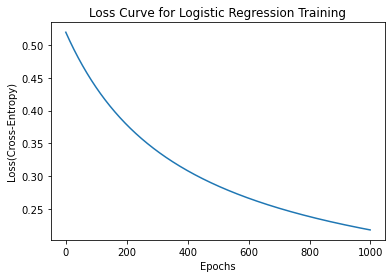

In [6]:
plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss(Cross-Entropy)")
plt.title("Loss Curve for Logistic Regression Training")
plt.show()

In [ ]:
import numpy 

In [ ]:
import numpy.random
import numpy.random
import numpy.random


class Logistic:
    def __init__(self, epochs=1000, lr = 0.001, l2_lamba=0.01,batch_size=30):
        self.epochs = epochs
        self.lr = lr
        self.l2_lambda = l2_lamba
        self.batch_size = batch_size
        self.weight = None
        self.bias = None
        self.mean =None
        self. std = None
        self.loss_history = []
    def _sigmoid(self, z):
        z = numpy.clip(z,-500,500)
        return 1/(1+numpy.exp(-z))

    def train_model(self, X,y):
        n_samples, n_features = X.shape
        numpy.random.seed(42)
        self.weight= numpy.random.randn(n_features)
        self.bias = numpy.random.randn()
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        X = (X-self.mean)/self.std
        for i in range(self.epochs):
            indices = numpy.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            for j in range(0,n_samples,self.batch_size):
                X_batch = X_shuffled[j:j+self.batch_size]
                y_batch = y_shuffled[j:j+self.batch_size]
                batch_size = len(X_batch)
                z = numpy.dot(X_batch,self.weight)+ self.bias
                y_pred =self._sigmoid(z)
                error = y_pred -y_batch

                gradient_weight = (1/batch_size)*numpy.dot(X_batch.T,error) 
                gradient_bias = (1/batch_size)* numpy.sum(error)

                gradient_weight += 2 * self.l2_lambda * self.weight

                self.weight -= self.lr * gradient_weight
                self.bias -= self.lr * gradient_bias

                loss = -numpy.mean(y_batch*numpy.log(y_pred)+(1-y_batch)*numpy.log(1-y_pred))
                l2_penalty = self.l2_lambda * numpy.sum(self.weight**2)
                loss += l2_penalty

                self.loss_history.append(loss)
    
    def prediction(self,X):
        pass








        

In [ ]:
class LogisticRegression:
    def __init__(self, lr=0.01, l2_lambda=0.001, epochs=1000, patience=5,delta=0.001):
        self.weight=None
        self.bias= None
        self.lr = lr
        self.l2_lambda = l2_lambda
        self.epochs = epochs
        self.loss_history = []
        self.patience = patience
        self.delta = delta

        self.best_weight_v = None
        self.best_bias_v = None

        self.val_loss_history = []
        self.wait =0
        self.early_stop = False
        self.best_loss = None


    def _sigmoid(self, z):
       return 1/(1+numpy.exp(-z))
    def training(self,X,y,X_val,y_val):
        n_samples, n_features = X.shape
        numpy.random.seed(42)
        self.weight= numpy.random.randn(n_features)
        self.bias = numpy.random.randn()
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        X = (X-self.mean)/self.std
        X_val = (X_val-self.mean)/self.std
        for i in range(self.epochs):
            indices = numpy.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            for j in range(0,n_samples,self.batch_size):
                X_batch = X_shuffled[j:j+self.batch_size]
                y_batch = y_shuffled[j:j+self.batch_size]
                batch_size = len(X_batch)

                z = numpy.dot(X_batch,self.weight)+ self.bias
                y_pred =self._sigmoid(z)
                error = y_pred -y_batch

                gradient_weight = (1/batch_size)*numpy.dot(X_batch.T,error) 
                gradient_bias = (1/batch_size)* numpy.sum(error)

                gradient_weight += 2 * self.l2_lambda * self.weight

                self.weight -= self.lr * gradient_weight
                self.bias -= self.lr * gradient_bias

                loss = -numpy.mean(y_batch*numpy.log(y_pred)+(1-y_batch)*numpy.log(1-y_pred))
                l2_penalty = self.l2_lambda * numpy.sum(self.weight**2)
                loss += l2_penalty

                self.loss_history.append(loss)
            z_val = numpy.dot(X_val,self.weight) + self.bias
            y_pred_val = self._sigmoid(z_val)
            val_loss = -numpy.mean(y_val*numpy.log(y_pred_val)+(1-y_val)*numpy.log(1-y_pred_val))

            self.val_loss_history.append(val_loss)
            if self.best_loss is None or val_loss < self.best_loss - self.delta:
                self.best_loss = val_loss
                self.best_weight_v = numpy.copy(self.weight)
                self.best_bias_v = numpy.copy(self.bias)
                self.wait = 0
            else:
                self.wait =+1
                if self.wait >= self.patience:
                    print(f"Early stopping at epochs {i}")
                    self.early_stop = True
                    break
        if self.best_weight_v is not None:
            self.weight = self.best_weight_v
            self.bias = self.best_bias_v
        
    def predict(self, X):
        z = numpy.dot(X,self.weight)+self.bias
        y_pred = self._sigmoid(z)
        return y_pred
    def calculate_loss(self, Y_true,Y_pred):
        epsilon = 1e-15
        y_pred = numpy.clip(y_pred,epsilon,1-epsilon)
        return - numpy.mean(Y_true*numpy.log(y_pred)+(1-Y_true)*numpy.log(1-Y_pred))
    


In [ ]:
import numpy as np

class Logistic:
    def __init__(self, epochs=1000, lr=0.001, l2_lambda=0.01, batch_size=30,
                 patience=5, delta=0.001):
        self.epochs = epochs
        self.lr = lr
        self.l2_lambda = l2_lambda
        self.batch_size = batch_size
        self.patience = patience
        self.delta = delta  # Minimum improvement to reset patience

        self.weight = None
        self.bias = None
        self.mean = None
        self.std = None

        self.loss_history = []
        self.val_loss_history = []

        self.best_loss = None
        self.best_weights = None
        self.best_bias = None
        self.wait = 0
        self.early_stop = False

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def train_model(self, X, y, X_val, y_val):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        np.random.seed(42)
        self.weight = np.random.randn(n_features)
        self.bias = np.random.randn()

        # Normalize training data
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        X = (X - self.mean) / (self.std + 1e-8)

        # Normalize validation data using training stats
        X_val = (X_val - self.mean) / (self.std + 1e-8)

        for i in range(self.epochs):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for j in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[j:j+self.batch_size]
                y_batch = y_shuffled[j:j+self.batch_size]
                batch_size_current = len(X_batch)

                # Forward pass
                z = np.dot(X_batch, self.weight) + self.bias
                y_pred = self._sigmoid(z)
                error = y_pred - y_batch

                # Gradient computation
                grad_weight = (1 / batch_size_current) * np.dot(X_batch.T, error)
                grad_bias = (1 / batch_size_current) * np.sum(error)

                # L2 Regularization
                grad_weight += 2 * self.l2_lambda * self.weight

                # Update weights and bias
                self.weight -= self.lr * grad_weight
                self.bias -= self.lr * grad_bias

                # Compute training loss (with L2 penalty)
                loss = -np.mean(y_batch * np.log(y_pred + 1e-15) +
                                (1 - y_batch) * np.log(1 - y_pred + 1e-15))
                l2_penalty = self.l2_lambda * np.sum(self.weight ** 2)
                loss += l2_penalty
                self.loss_history.append(loss)

            # Validation phase (after each epoch)
            z_val = np.dot(X_val, self.weight) + self.bias
            y_pred_val = self._sigmoid(z_val)
            val_loss = -np.mean(y_val * np.log(y_pred_val + 1e-15) +
                                (1 - y_val) * np.log(1 - y_pred_val + 1e-15))
            self.val_loss_history.append(val_loss)

            # Early stopping logic
            if self.best_loss is None or val_loss < self.best_loss - self.delta:
                self.best_loss = val_loss
                self.best_weights = np.copy(self.weight)
                self.best_bias = np.copy(self.bias)
                self.wait = 0
            else:
                self.wait += 1
                if self.wait >= self.patience:
                    print(f"Early stopping at epoch {i}")
                    self.early_stop = True
                    break

        # Restore best weights and bias
        if self.best_weights is not None:
            self.weight = self.best_weights
            self.bias = self.best_bias

    def predict(self, X):
        X_norm = (X - self.mean) / (self.std + 1e-8)
        z = np.dot(X_norm, self.weight) + self.bias
        y_pred = self._sigmoid(z)
        return y_pred
